# Second Assignment

The goal of this assignment is to use the iris dataset to train a classifier in asupervised fashion and a clusterer in unsupervised fashion.

**Deadline: To Be Confirmed by the Tutor**. 

**Submission:** Please email your solutions and your completed Declaration of Authorship (DoA) form to weeklyclasses@conted.ox.ac.uk 

### Setup

In [1]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥ 1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

### Import data and training test split

Let's import the iris dataset first.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#### Part 1: Dataset prep.

I am going to load the input variables and the target variables as separate datasets. To do that I am first printing out all the keys of the `iris` dataset

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Train-test splitting (3 points)

As a first step let's split the dataset into training (2/3 of the data) and test set (1/3 of the data)

#### Part 2: Creating the training and testing dataset and feature scaling

Now that I have prepared the data and have creating the input dataframe and target dataframe I will not create the training and testing datasets and will also featue scale the input variables

In [4]:
# Write your solution here
from sklearn.model_selection import train_test_split #importing the `train_test_split` library

#creating the training and testing datasets
X_Train, X_Test, y_Train, y_Test = train_test_split(iris.data, iris.target, test_size=1/3, random_state=42, stratify=iris.target)

#printing out the shape of the training and testing dataset
print('The shaope of the original dataset is: ', iris.data.shape)
print('The shape of the training dataset is: ', X_Train.shape)
print('The shaope of the testing dataset is: ', X_Test.shape)

The shaope of the original dataset is:  (150, 4)
The shape of the training dataset is:  (100, 4)
The shaope of the testing dataset is:  (50, 4)


As you can see, I have successfully allocated the original dataset into 2/3 of training data and 1/3 of testing data. This can be seen above where I printed out the shapes of the training and testing dataset. 

*  The training dataset has 100 rows which is 66% of the original dataset (100/150 = 0.66)
*  The testing dataset has 50 rows which is 33% of the original dataset (50/150 = 0.33)

### Feature scaling (4 points)

Then let's perform feature scaling (up to you whether you want to use standardisation or normalisation)

#### Method 1: Standardisation

I am including code on how to perform both, standardisation and normalisation. I will be going with normalisation but wanted to show both methods of feature scaling.

In [5]:
# Write your solution here
#from sklearn.preprocessing import StandardScaler #importing the `StandardScaler` library for standardisation

#scaler_standard = StandardScaler() #importing the scaler
#X_Train_standardized = scaler_standard.fit_transform(X_Train)
#X_Test_standardized = scaler_standard.fit_transform(X_Test)

#### Method 2: Normalisation (min-max scaling)

The code below shows how I apply noralisation on the input data using the `MinMaxScaler` library

In [6]:
from sklearn.preprocessing import MinMaxScaler #importing the `MinMaxScaler` library for normalisation
scaler_minmax = MinMaxScaler()#importing the scaler

X_Train_normalized = scaler_minmax.fit_transform(X_Train)
X_Test_normalized = scaler_minmax.fit_transform(X_Test)

I am using the method that Professor Izzo shared in lecture [3.1: Pre-processing data pipeline: imputation, feature engineering, and scaling -min. 15:18](https://ox.cloud.panopto.eu/Panopto/Pages/Viewer.aspx?id=9c07c095-8b52-45fd-bfad-ae97007fa057&start=687.632706) to check whether the ranges of the standardised features are in the same range.

In [7]:
X_Train_normalized.min(axis=1), X_Train_normalized.max(axis=1)

(array([0.56, 0.05, 0.29, 0.25, 0.05, 0.  , 0.07, 0.46, 0.04, 0.04, 0.33,
        0.  , 0.21, 0.08, 0.33, 0.42, 0.04, 0.04, 0.42, 0.12, 0.33, 0.04,
        0.04, 0.75, 0.  , 0.38, 0.33, 0.21, 0.  , 0.25, 0.  , 0.54, 0.17,
        0.42, 0.38, 0.04, 0.21, 0.07, 0.5 , 0.04, 0.36, 0.25, 0.03, 0.46,
        0.17, 0.42, 0.03, 0.29, 0.44, 0.75, 0.03, 0.25, 0.03, 0.54, 0.38,
        0.33, 0.29, 0.33, 0.12, 0.46, 0.33, 0.33, 0.33, 0.29, 0.09, 0.5 ,
        0.29, 0.46, 0.42, 0.04, 0.25, 0.42, 0.42, 0.04, 0.08, 0.04, 0.09,
        0.67, 0.38, 0.21, 0.04, 0.5 , 0.5 , 0.5 , 0.07, 0.21, 0.42, 0.08,
        0.39, 0.42, 0.04, 0.54, 0.29, 0.5 , 0.1 , 0.04, 0.46, 0.05, 0.  ,
        0.04]),
 array([0.96, 0.62, 0.75, 0.54, 0.58, 0.87, 1.  , 0.76, 0.46, 0.46, 0.61,
        0.46, 0.42, 0.5 , 0.83, 0.71, 0.92, 0.67, 0.83, 0.75, 0.96, 0.71,
        0.58, 1.  , 0.67, 0.64, 0.71, 0.5 , 0.42, 0.57, 0.42, 1.  , 0.47,
        0.94, 0.55, 0.42, 0.79, 0.75, 0.92, 0.5 , 0.5 , 0.41, 0.79, 0.83,
        0.45, 0.64, 0.

## Part 1: Supervised training using K-Nearest Neighbourse


### Model creation (6 points) and training (2 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

Now, let's create and train a `KNeighborsClassifier`.

We want the following properties for our classifier:
* check 7 neighbours by default for the `kneighbors` queries.
* use the Manhattan distance metric to identify neighbours
* use the Ball Tree algortihm to compute the nearest neighbours, with a `leaf_size` of 3. Check the Ball Tree algorithm documentation on scikit-learn for more details.

Check the `KNeighborsClassifier` documentation to identify the arguments to pass to the `KNeighborsClassifier` constructor.

In [8]:
# Write your code here
from sklearn.neighbors import KNeighborsClassifier #imporing the k-nearest neighbor library
k_classifier = KNeighborsClassifier(n_neighbors=7, #number of k-neighbors
                                    metric='manhattan', #the distance metric
                                    algorithm='ball_tree', #specifying the algorithm to compute the nearest neighbors
                                    leaf_size=3 #specifying the leaf size
                                   ) 
k_classifier.fit(X_Train_normalized, y_Train) # Training the KNeighborsClassifier

KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, metric='manhattan',
                     n_neighbors=7)

### Evaluation on the training set (5 points)

Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

In [9]:
# Write your code here
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_Train,
                                          k_classifier.predict(X_Train_normalized)
                                         )
print("Confusion matrix of training set:\n", confusion_matrix_train)

Confusion matrix of training set:
 [[34  0  0]
 [ 0 31  2]
 [ 0  1 32]]


Compute precision, recall, and F1 score for each class prediction on the training set and print out a report.

In [10]:
from sklearn.metrics import classification_report
# Write your code here
print("\nClassification report of training set:\n", classification_report(y_Train, 
                                                                         k_classifier.predict(X_Train_normalized)
                                                                        )
     )


Classification report of training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.94      0.95        33
           2       0.94      0.97      0.96        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [11]:
iris.target_names #printing out the flower species names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Confusion Matrix and F1 Score analysis for training data

Analysis on iris-setosa
*  When looking at the confusion matrix you can see that iris-setosa was correctly classified and did not have any miss-classifications. This is why the F1 score for iris-setosa is 1.00

Analysis on iris-versicolor
*  When looking at the second row in the confusion matrix I can see that two of the labels for iris-versicolor were miss-classified as iris-virginica. When looking at the confusion matrix I can see that iris-versicolor is the flower species that has the most miss-classifications. This is why the F1 score and recall score for iris-versicolor is the lowest (with a f1 score of 0.95 and recall score of 0.94) as compared to the other flower species (setosa and virginica)

Analysis on iris-virginica
*   When looking at the third row in the confusion matrix I can see that iris-virginica was miss-classified one time (this value is less than iris-versicolor which was miss-classified two times). As a result, the F1 score for iris-virginica (0.96) is higher than the F1 score for iris-versicolor (0.95) since iris-virginica had a lower amount of miss-classifications

How does the result look like? Has anything been misclassified?


### Evaluation on the test set (5 points)

Now make predictions on the test set, compute the confusion matrix for the test set. how does it compare to the one of the training set?

In [12]:
# Write your code here
confusion_matrix_test = confusion_matrix(y_Test,
                                          k_classifier.predict(X_Test_normalized)
                                         )
print("Confusion matrix of test set:\n", confusion_matrix_test)

Confusion matrix of test set:
 [[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]


Compute precision, recall, and F1 score for each class prediction on the test set and print out a report.

In [13]:
# Write your code here
print("\nClassification report of test set:\n", classification_report(y_Test, 
                                                                         k_classifier.predict(X_Test_normalized)
                                                                        )
     )


Classification report of test set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.84      0.94      0.89        17
           2       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



#### Confusion Matrix and F1 Score analysis for test data

Analysis on iris-setosa
*   When looking at the confusion matrix you can see that iris-setosa was correctly classified for the test data and was also correctly classified 100% in the training data confusin matrix as well. The F1 score for iris-setosa on both, the training and test dataset is 1.00 which means that no miss-classifications happened for this label

Analysis on iris-versicolor
*   When looking at the second row of the confusion matrix I notice that there is only one miss-classification of iris-versicolor as iris-virginica. The number of miss-classifications for iris-versicolor is less than the number of miss-classifications for iris-vvirginica which is the opposite of what happened in the training dataset confusion matrix (-iris-versicolor had more miss-classifications than iris-virginica)
*   As a result, the F1 score for iris-versicolor is 0.89 which is slightly bigger than the F1 score of iris-virginica. I did notice a drastic decrease in the F1 score of the test data and training dataset because the previous F1 score for iris-versicolor was 0.95 and now the F1 score dropped to 0.89.

Analysis on iris-virginica
*   When looking at the third row of the confusion matrix I notice that there are three miss-classifications of iris-virginica which is the highest number of miss-classifications on the confusion matrix for the test dataset. Even on the training data confusion matrix the highest amount of miss-classifications was two so I was suprised to see this amount of miss-classifications.
*   As a result, the F1 score for iris-virginica is the lowest (0.87) when compared to the other flower species. The F1 score has experienced a 0.09 drop in F1 scores when compared to the training dataset F1 scores (the training dataset F1 score was 0.96). I was suprised to see this drop since I assumed that the categorisation of iris-virginica would have been better based off of the training data results. This means that the K-nearest neighbor classifier will correctly classify the iris-setosa species but will make some errors when classifying iris-versicolor and iris-virginica

## Part 2: Unsupervised Learning using K-Means (10 points)

Train K-means clusterers on the entire iris dataset.

Train clusters with 2 to 6 clusters and use one of the metrics discussed in week 7 to show which is the optimal number of clusters

In [16]:
# Write your code here. Add as many cells as you need.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_scores = []  # To store silhouette scores of the models
count = 2
cluster_count_list = []
while count < 7:
    kmeans = KMeans(n_clusters=count, n_init=10, random_state=42)
    kmeans.fit(iris.data)
    inertia_scores.append(silhouette_score(iris.data, kmeans.labels_))
    cluster_count_list.append(count)
    count += 1

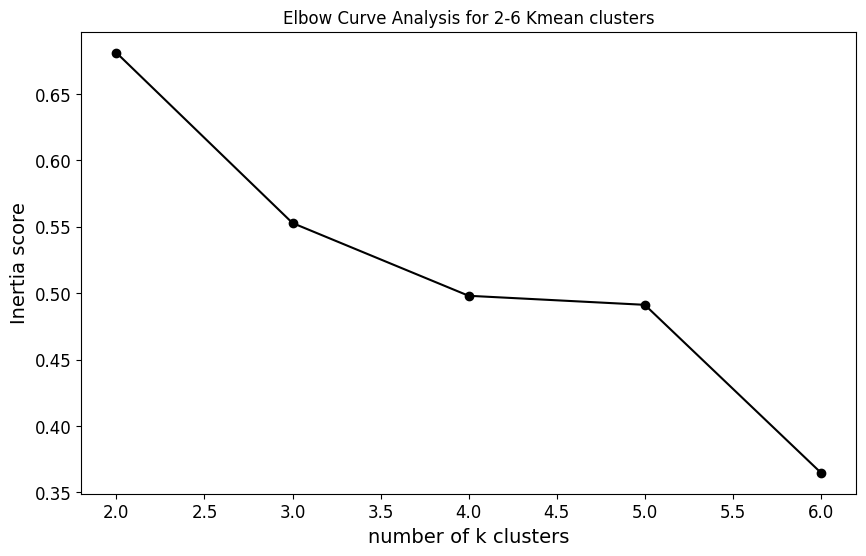

In [15]:
# Ploting the inertia/silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_count_list,inertia_scores, marker = "o", color='black')
plt.title("Elbow Curve Analysis for 2-6 Kmean clusters")
plt.xlabel("number of k clusters", fontsize=14)
plt.ylabel("Inertia score", fontsize=14)
plt.show()

#### K-Cluster Means analysis using elbow curve

Looking at the elbow curve I can see that cluster 3 has the biggest inertia score difference of 0.15 so I would say that the third cluster is the most ideal one to use (this makes sense since there are three groups of flower species). Cluster six also appears to have the same inertia difference of 0.15 as well, but I would pick cluster number three as the ideal cluster because if I were to graph the first five clusters then cluster three would be the only point in the elbow graph to have the biggest inetia difference.

That's it. Congratulations, you have completed the second assignment!